## Introduction

Clustering is the task of __dividing the population__ or __data points__ into _a number of groups_ such that _data points in the same groups are more similar to other data points in the same group_ than those in other groups. 
> __In simple words, the aim is to segregate groups with similar traits and assign them into clusters__. 

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression
- Behavioral Segmentation
- Inventory Categorization
- Sorting Sensor measurements
- Detecting bots and anomalies
- Computer Vision
- Astronomy


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

## Import libraries
Lets first import the required libraries. Also run %matplotlib inline since we will be plotting in this section.

In [1]:
import random  
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

## k-Means on a randomly generated dataset
- Lets create our own dataset for this lab!
- First we need to set up a random seed. Use numpy's random.seed() function, where the seed will be set to 0

In [2]:
np.random.seed(0)

> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>
Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u

In [5]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

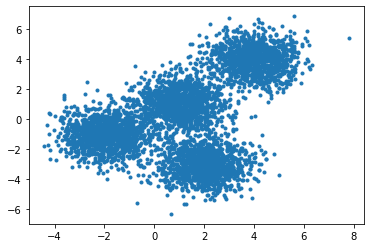

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
- Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 3, 1, 1])

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95489462, -1.03564706],
       [ 3.99211079,  3.99540917],
       [ 2.00811148, -3.01440138],
       [ 1.01557176,  1.03442098]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

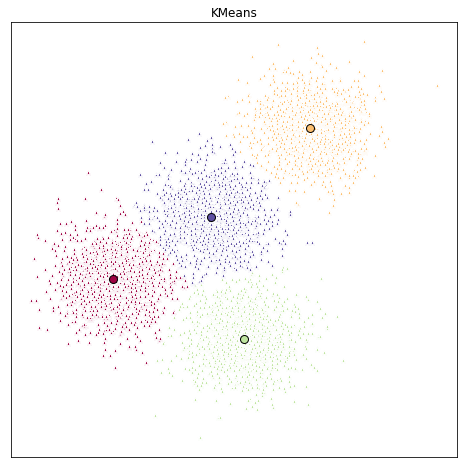

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(8, 8))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='*')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Three Clusters

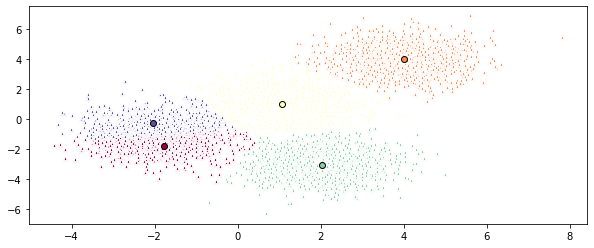

In [12]:
# write your code here


k_means3 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(10, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='*')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

## Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot stylin


In [8]:
# Importing the dataset
c_data = pd.read_excel("Cust_Segmentation.xlsx")
c_data.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8


In [9]:
#descriptive statistics of the dataset
c_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Id,850.0,425.500000,245.518160,1.000,213.25000,425.500,637.75000,850.000
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.00000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.00000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.00000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.75000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.89850,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.90325,35.197
Defaulted,700.0,0.261429,0.439727,0.000,0.00000,0.000,1.00000,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.80000,41.300


- The dataset consists of 309 rows. The mean annual income is 245000 and the mean annual spend is 149000.

Text(0.5, 0, 'Income / Card Debt')

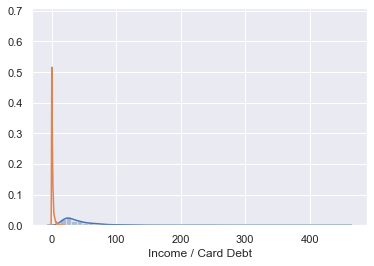

In [11]:
#Visualizing the data - displot
plot_income = sns.distplot(c_data["Income"])
plot_spend = sns.distplot(c_data["Age"])
plt.xlabel('Income / Card Debt')

[(0, 420)]

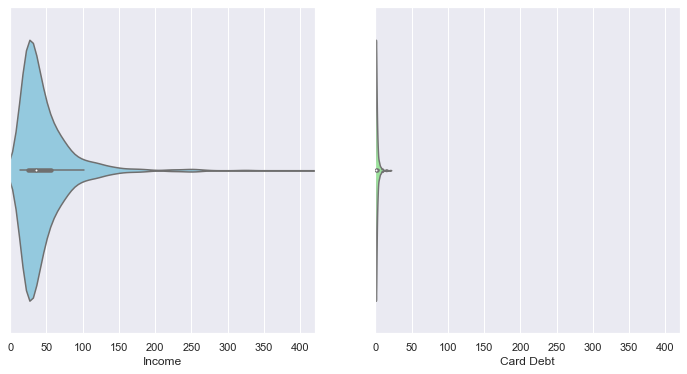

In [12]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=c_data, x='Income', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=c_data, x='Card Debt',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

## Why Clustering?

- The mathematics behind clustering, in very simple terms involves minimizing the sum of square of distances between the cluster centroid and its associated data points
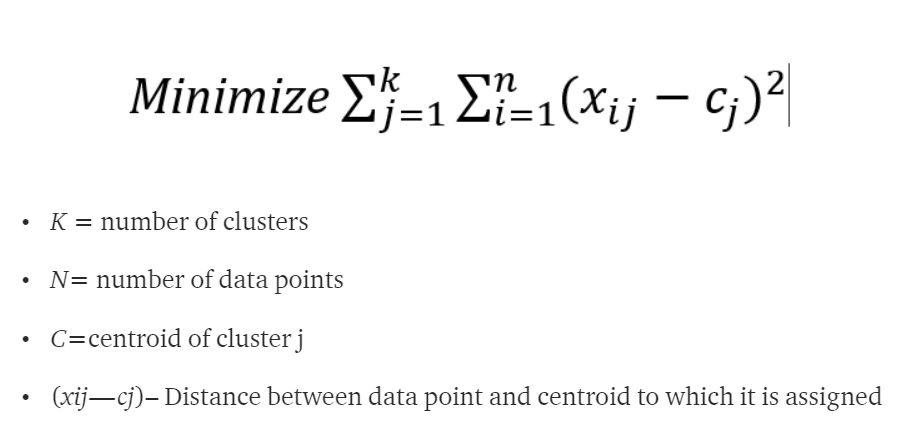



In [13]:
X= c_data.iloc[:, [0,1]].values

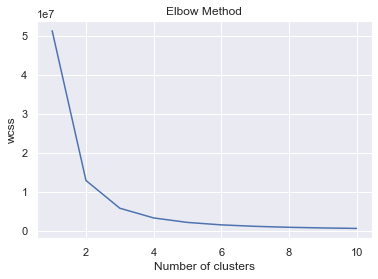

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
#Model Build
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[213.          34.90823529]
 [638.          35.15058824]]


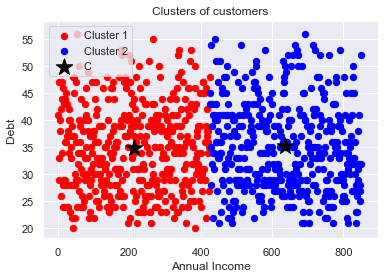

In [17]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Debt ')
plt.legend()
plt.show()

### Insights
The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

- Cluster 1: Customers with medium annual income and low annual spend
- Cluster 2: Customers with high annual income and medium to high annual spend
- Cluster 3: Customers with low annual income
- Cluster 4: Customers with medium annual income but high annual spend

In [18]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[709.          34.66784452]
 [142.5         34.76408451]
 [426.          35.65724382]]


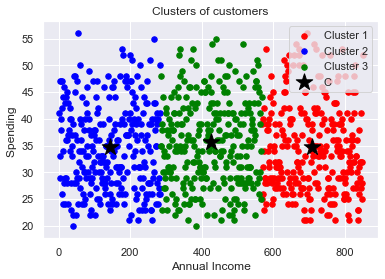

In [19]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending ')
plt.legend()
plt.show()

### Insights :
- Cluster 1: Medium income, low annual spend
- Cluster 2: Low income, low annual spend
- Cluster 3: High income, high annual spend
- Cluster 4: Low income, high annual spend
- Cluster 5: Medium income, low annual spend
